In [ ]:
import numpy as np    # For array operations
import pandas as pd   # For DataFrames

In [ ]:
unibank = pd.read_csv('UniversalBank.csv')
unibank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
## Check the datatype of each variable
unibank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
## Drop columns which are not significant
del unibank['ID']
del unibank["ZIP Code"]

In [ ]:
unibank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Correlation Plot

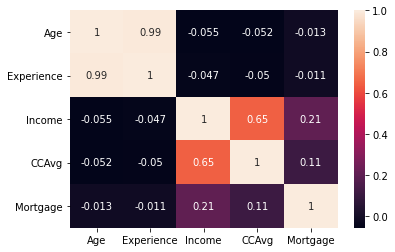

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.DataFrame(unibank,columns=['Age','Experience','Income','CCAvg','Mortgage'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = unibank.copy().drop("Personal Loan",axis=1)
y = unibank["Personal Loan"]

## Split the data into trainx, testx, trainy, testy with test_size = 0.20 using sklearn
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4000, 11)
(1000, 11)
(4000,)
(1000,)


# **Logistic Regression**

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
trainx = sc_x.fit_transform(trainx)  
testx = sc_x.transform(testx)

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 10) 
classifier.fit(trainx, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(testx)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(testy, y_pred))

Accuracy :  0.944


# **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

## Create an SVC object and print it to see the default arguments
svc = SVC()
print(svc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
## Fit
svc.fit(trainx,trainy)

## Predict
train_predictions = svc.predict(trainx)
test_predictions = svc.predict(testx)

In [ ]:
model_C = SVC(C=2)
model_C.fit(trainx, trainy)
model_C.score(testx, testy)


0.978

In [ ]:
model_C = SVC(C=1)
model_C.fit(trainx, trainy)
model_C.score(testx, testy)

0.978

In [ ]:
model_g = SVC(gamma=0.002)
model_g.fit(trainx, trainy)
model_g.score(testx, testy)

0.941

In [ ]:
model_g = SVC(gamma=0.001)
model_g.fit(trainx, trainy)
model_g.score(testx, testy)

0.925

In [ ]:
#Most optimised model at C=2 and gamma= 0.002
#Kernel
model_linear_kernal = SVC(kernel='linear',C=2,gamma=0.002)
model_linear_kernal.fit(trainx, trainy)
model_linear_kernal.score(testx, testy)

0.949

In [ ]:
model_g = SVC(kernel='rbf',gamma=0.002,C=2)
model_g.fit(trainx, trainy)
model_g.score(testx, testy)

0.945

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
clf= GridSearchCV(svm.SVC(gamma='auto'),{
'C':[1,2,10,20],
'kernel':['rbf','linear']
},cv=5, return_train_score=False)
clf.fit(trainx,trainy)
score=clf.predict(testx)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(testy,score)
CM

array([[893,  10],
       [ 16,  81]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,2,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(unibank.drop('Personal Loan',1),unibank["Personal Loan"])
clf.cv_results_

{'mean_fit_time': array([  1.18865905,  11.28780994,   1.23748889,  19.17554913,
          1.20156012, 102.06026468,   1.24568915, 117.97513361]),
 'mean_score_time': array([0.2061306 , 0.00802007, 0.20381031, 0.00747418, 0.20111923,
        0.00764785, 0.19205275, 0.00673451]),
 'mean_test_score': array([0.907 , 0.9514, 0.9132, 0.9512, 0.9134, 0.9512, 0.9134, 0.9494]),
 'param_C': masked_array(data=[1, 1, 2, 2, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear',
                    'rbf', 'linear'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 2, 'kernel': 'rbf'},
  {'C': 2, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 

In [ ]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.188659,0.057392,0.206131,0.002878,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.905,0.908,0.907,0.909,0.906,0.9070,0.001414,8
1,11.287810,2.957858,0.008020,0.000209,1,linear,"{'C': 1, 'kernel': 'linear'}",0.952,0.949,0.956,0.948,0.952,0.9514,0.002800,1
2,1.237489,0.019715,0.203810,0.001049,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.913,0.913,0.913,0.916,0.911,0.9132,0.001600,7
3,19.175549,5.265620,0.007474,0.000904,2,linear,"{'C': 2, 'kernel': 'linear'}",0.952,0.947,0.956,0.949,0.952,0.9512,0.003059,2
4,1.201560,0.068348,0.201119,0.002756,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.912,0.912,0.916,0.916,0.911,0.9134,0.002154,5
5,102.060265,14.363396,0.007648,0.000240,10,linear,"{'C': 10, 'kernel': 'linear'}",0.952,0.946,0.957,0.945,0.956,0.9512,0.004956,2
6,1.245689,0.109311,0.192053,0.012821,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.912,0.912,0.916,0.916,0.911,0.9134,0.002154,5
7,117.975134,20.066700,0.006735,0.000178,20,linear,"{'C': 20, 'kernel': 'linear'}",0.947,0.945,0.955,0.944,0.956,0.9494,0.005083,4


In [ ]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.9070
1,1,linear,0.9514
2,2,rbf,0.9132
3,2,linear,0.9512
4,10,rbf,0.9134
5,10,linear,0.9512
6,20,rbf,0.9134
7,20,linear,0.9494


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
NB = GaussianNB()

NB.fit(X , y)

NB_train_pred = NB.predict(X)
print(accuracy_score(y,NB_train_pred))

NB_test_pred = NB.predict(testx)
print(accuracy_score(testy,NB_test_pred))

0.883
0.897


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_classifier = KNeighborsClassifier(algorithm='brute',weights='distance')
params = {'n_neighbors':[1,11,25],'metric':["euclidean",'cityblock']}
grid = GridSearchCV(knn_classifier,param_grid=params,scoring='accuracy',cv=10)

In [ ]:
grid.fit(trainx,trainy)
print(grid.best_score_)
print(grid.best_params_)

0.9594999999999999
{'metric': 'euclidean', 'n_neighbors': 1}


In [ ]:
best_knn = grid.best_estimator_
pred_train = best_knn.predict(trainx) 
pred_test = best_knn.predict(testx)
print("Accuracy on train is:",accuracy_score(trainy,pred_train))
print("Accuracy on test is:",accuracy_score(testy,pred_test))

Accuracy on train is: 1.0
Accuracy on test is: 0.955


# **Decison Tree**

In [ ]:
from sklearn import tree

# Defining the model
# Fit / train the model
dtc = tree.DecisionTreeClassifier()
dtc.fit(trainx,trainy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Get the prediction for both train and test
pred_train = dtc.predict(trainx)
pred_test = dtc.predict(testx)
# Measure the accuracy of the model for both train and test sets
print("Accuracy on train is:",accuracy_score(trainy,pred_train))
print("Accuracy on test is:",accuracy_score(testy,pred_test))

Accuracy on train is: 1.0
Accuracy on test is: 0.986


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
print(rfc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
rfc.fit(trainx,trainy)
## Predict
rfc_train_predictions = rfc.predict(trainx)
rfc_test_predictions = rfc.predict(testx)

### Train data accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(trainy,rfc_train_predictions))
      
### Test data accuracy
print(accuracy_score(testy,rfc_test_predictions))

NameError: ignored

Search Grid for Hyper paramenter tuning




In [ ]:
from sklearn.model_selection import RandomizedSearchCV

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced_subsample')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"
 
param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20]}
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3, n_iter=10)
rfc_cv_grid.fit(trainx, trainy)
rfc_cv_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
## Predict
rfc2_train_predictions = rfc_cv_grid.predict(trainx)
rfc2_test_predictions = rfc_cv_grid.predict(testx)

print(accuracy_score(trainy,rfc2_train_predictions))
      
### Test data accuracy
print(accuracy_score(testy,rfc2_test_predictions))

0.988
0.974
